In [804]:
#Michael Lust : 801094861
#ECGR 4105 Intro to Machine Learning
#December 8, 2021
#Final Project

In [805]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.datasets import load_breast_cancer 

In [806]:
stroke = pd.read_csv("dataset_250K.csv")

In [807]:
stroke.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [808]:
M = len(stroke)
print(M)
stroke.head(20)

253680


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [809]:
stroke.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [810]:
#Our Data set will consider Independent variables (X1-X21) and Label as Dependent (Y). 
X=stroke.iloc[:,[0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y=stroke.iloc[:,6].values #Stroke outcomes
#see here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.
X[0:2] #Shows the Array

array([[ 0.,  1.,  1.,  1., 40.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         5., 18., 15.,  1.,  0.,  9.,  4.,  3.],
       [ 0.,  0.,  0.,  0., 25.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         3.,  0.,  0.,  0.,  0.,  7.,  6.,  1.]])

In [811]:
Y[0:10] #Shows the outcome of either Benign or Malignant

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [812]:
#Now we’ll split our Data set into Training Data and Test Data.
#Logistic model and Test data will be used to validate our model. We’ll use Sklearn.
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.8, test_size = 0.2, random_state = 1)
X_train.shape

(202944, 21)

In [813]:
#Problem 1-a Logistic Regression Model

In [814]:
#Now we’ll do feature scaling to scale our data between -1 and 1 using standardization.
#Here Scaling is important because there is a significant difference between explanatory variables.
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
#scalar_X = StandardScaler()
scalar_X = MinMaxScaler()
X_train = scalar_X.fit_transform(X_train) #New X_train is scaled
X_test = scalar_X.transform(X_test) #New X_test is scaled

In [815]:
X_train[0:2] #Checking the scaling of training set

array([[0.        , 1.        , 0.        , 1.        , 0.30232558,
        1.        , 0.        , 1.        , 1.        , 1.        ,
        0.        , 1.        , 0.        , 0.5       , 0.        ,
        0.        , 0.        , 0.        , 0.91666667, 0.8       ,
        1.        ],
       [0.        , 0.        , 1.        , 1.        , 0.15116279,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.5       , 0.5       ,
        0.1       , 1.        , 0.        , 0.66666667, 1.        ,
        0.85714286]])

In [816]:
X_test[0:2] #Checking the scaling of testing set

array([[0.        , 1.        , 0.        , 1.        , 0.12790698,
        1.        , 0.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.        , 0.25      , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.71428571],
       [1.        , 0.        , 0.        , 1.        , 0.11627907,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.        , 0.25      , 0.        ,
        0.16666667, 0.        , 1.        , 0.66666667, 1.        ,
        1.        ]])

In [817]:
#Import LogisticRegression from sklearn.linear_model
#Make an instance classifier of the object LogisticRegression and give random_state = 0 
from sklearn.linear_model import LogisticRegression
classifier_L = LogisticRegression(random_state=0)
classifier_L.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [818]:
Y_pred = classifier_L.predict(X_test)

In [819]:
Y_pred[0:30] #Checking Outcome from testing set

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [820]:
#Using Confusion matrix representing binary classifiers so we can get accuracy of our model.
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test,Y_pred)
cnf_matrix

array([[48655,    11],
       [ 2053,    17]], dtype=int64)

In [821]:
#We are evaluating the model using model evaluation metrics for accuracy.
#Accuracy over loss is what needs to be plotted
#Prediction and recall do not function with Y values or outcomes as string values.
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred))
print("Precision:",metrics.precision_score(Y_test,Y_pred))
print("Recall:",metrics.recall_score(Y_test,Y_pred))

Accuracy: 0.9593188268684958
Precision: 0.6071428571428571
Recall: 0.00821256038647343


Text(0.5, 257.44, 'Predicted label')

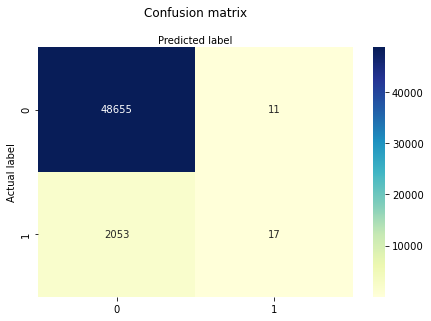

In [822]:
#Plotting the confusion matrix:
import seaborn as sns 
class_names = [0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [823]:
#Problem 1-b Naive Bays Model

In [824]:
#Our Data set will consider Independent variables (X1-X30) and Label as Dependent (Y). 
X=stroke.iloc[:,[0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y=stroke.iloc[:,6].values #Stroke outcomes
#see here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.
X[0:2] #Shows the Array

array([[ 0.,  1.,  1.,  1., 40.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         5., 18., 15.,  1.,  0.,  9.,  4.,  3.],
       [ 0.,  0.,  0.,  0., 25.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         3.,  0.,  0.,  0.,  0.,  7.,  6.,  1.]])

In [825]:
Y[0:8] #Shows the outcome of either Benign or Malignant

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [826]:
#Now we’ll split our Data set into Training Data and Test Data.
#Logistic model and Test data will be used to validate our model. We’ll use Sklearn.
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size =0.8, test_size = 0.2, random_state = 1)
X_train.shape

(202944, 21)

In [827]:
#Now we’ll do feature scaling to scale our data between -1 and 1 using standardization.
#Here Scaling is important because there is a significant difference between explanatory variables.
#scalar_X = StandardScaler()
scalar_X = MinMaxScaler()
X_train = scalar_X.fit_transform(X_train) #New X_train is scaled
X_test = scalar_X.transform(X_test) #New X_test is scaled

In [828]:
#Import Naive Bays from sklearn.naive_bayes
#Make an instance classifier of the object Naive Bayes and give random_state = 0 
from sklearn.naive_bayes import GaussianNB
classifier_G = GaussianNB()
classifier_G.fit(X_train,Y_train)

GaussianNB()

In [829]:
Y_pred = classifier_G.predict(X_test)
Y_pred

array([0., 0., 0., ..., 1., 0., 0.])

In [830]:
#Using Confusion matrix representing binary classifiers so we can get accuracy of our model.
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test,Y_pred)
cnf_matrix

array([[41565,  7101],
       [  932,  1138]], dtype=int64)

In [831]:
#We are evaluating the model using model evaluation metrics for accuracy.
#Accuracy over loss is what needs to be plotted
#Prediction and recall do not function with Y values or outcomes as string values.
print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred))
print("Precision:",metrics.precision_score(Y_test,Y_pred))
print("Recall:",metrics.recall_score(Y_test,Y_pred))

Accuracy: 0.8416706086408073
Precision: 0.13812355868430634
Recall: 0.5497584541062802


Text(0.5, 257.44, 'Predicted label')

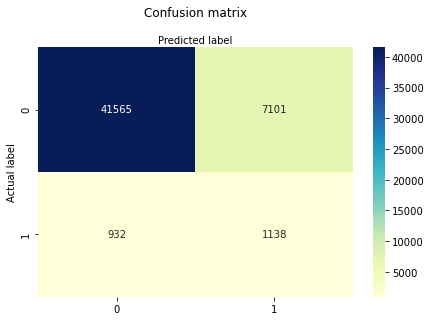

In [832]:
#Plotting the confusion matrix:
import seaborn as sns 
class_names = [0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [833]:
#Problem 2 PCA Feature Extraction

In [834]:
#Plotting the loss vs. Number of Iterations for all X explanatory values combined does
#not seem doable with the logistic regression library. We will have to implement our own
#logistic regression function like we did for linear regression in problem 1.
#Logistic regression uses a log function to classify data points and will not suite 
#the training model for this dataset.

In [835]:
#Part 2-a PCA with logistic regression

In [836]:
#Our Data set will consider Independent variables (X1-X30) and Label as Dependent (Y). 
X=stroke.iloc[:,[0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y=stroke.iloc[:,6].values #Stroke outcomes
#see here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.
Y[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [837]:
stroke.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [838]:
#Doing this scaling instead
#Now we’ll do feature scaling to scale our data between -1 and 1 using standardization.
#Here Scaling is important because there is a significant difference between explanatory variables. 
#scalar_X = StandardScaler()
scalar_X = MinMaxScaler()
X = scalar_X.fit_transform(X) #New X is scaled
X[0:2]

array([[0.        , 1.        , 1.        , 1.        , 0.3255814 ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 0.6       ,
        0.5       , 1.        , 0.        , 0.66666667, 0.6       ,
        0.28571429],
       [0.        , 0.        , 0.        , 0.        , 0.15116279,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.5       , 0.        ,
        0.        , 0.        , 0.        , 0.5       , 1.        ,
        0.        ]])

In [839]:
#Using Principle Component Analysis with specific N number of independent trainings
#Setting up function to plot precision, recall, and accuracy, over different K values.
#This involves creating a matrix to iterate over for the three results.
from sklearn.decomposition import PCA 
pcaDF = []

for i in range(20): #n_components must be between 0 and min(n_samples, n_features) = 30 with svd_solver='full'
    n_components = i + 2 #at least one array or dtype is required
    pca = PCA(n_components) #Iterating through all n values until reaching K.
    #principalComponents = pca.fit_transform(X_train)
    #-----------------------------------------------------------#
    principalComponents_train = pca.fit_transform(X)
    #------------------------------------------------------------#
    principalDf = pd.DataFrame(data = principalComponents_train, columns = range(n_components))
                 #, columns = ['principal component 1', 'principal component 2']) 
    finalDf = pd.concat([principalDf, stroke[['Stroke']]], axis = 1)
    Y_principal = finalDf.iloc[:,[n_components]].values
    X_principal = finalDf.iloc[:,0:(n_components - 1)] 
    
    #Doing Training and Test Split to evaluate accuracy.
    np.random.seed(0)
    X_train, X_test, Y_train, Y_test = train_test_split(X_principal,Y_principal,train_size =0.8,test_size = 0.2,random_state = 1)
    
    #Using Logistic Regression for Classification
    classifier_L = LogisticRegression(random_state = 0)
    classifier_L.fit(X_train, np.ravel(Y_train)) #Changed the shape of y to (n_samples, ) 
    
    Y_pred1 = classifier_L.predict(X_test)
    Y_pred1[0:9]
    
    #Using Confusion matrix representing binary classifiers so we can get accuracy of our model.
    cnf_matrix = confusion_matrix(Y_test,Y_pred1)
    cnf_matrix
    
    #We are evaluating the model using model evaluation metrics for accuracy.
    #Accuracy over loss is what needs to be plotted
    from sklearn import metrics
    Acc_score1 = metrics.accuracy_score(Y_test,Y_pred1)
    print("Accuracy:", Acc_score1)
    Prec_score1 = metrics.precision_score(Y_test,Y_pred1)
    print("Precision:", Prec_score1)
    Rec_score1 = metrics.recall_score(Y_test,Y_pred1)
    print("Recall:", Rec_score1)
    
    pcaDF.append([n_components,Acc_score1,Prec_score1,Rec_score1])
print(pcaDF)
    
    

Accuracy: 0.9592005676442763
Precision: 0.0
Recall: 0.0


G:\Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9592005676442763
Precision: 0.0
Recall: 0.0


G:\Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9592005676442763
Precision: 0.0
Recall: 0.0


G:\Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9592005676442763
Precision: 0.0
Recall: 0.0


G:\Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9592005676442763
Precision: 0.0
Recall: 0.0


G:\Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9592005676442763
Precision: 0.0
Recall: 0.0


G:\Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9592005676442763
Precision: 0.0
Recall: 0.0


G:\Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.959180857773573
Precision: 0.0
Recall: 0.0
Accuracy: 0.959180857773573
Precision: 0.0
Recall: 0.0
Accuracy: 0.9592005676442763
Precision: 0.0
Recall: 0.0


G:\Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9591414380321666
Precision: 0.2857142857142857
Recall: 0.000966183574879227
Accuracy: 0.9591414380321666
Precision: 0.2857142857142857
Recall: 0.000966183574879227
Accuracy: 0.9591414380321666
Precision: 0.36363636363636365
Recall: 0.001932367149758454
Accuracy: 0.9591414380321666
Precision: 0.36363636363636365
Recall: 0.001932367149758454
Accuracy: 0.9590823084200568
Precision: 0.39285714285714285
Recall: 0.005314009661835749
Accuracy: 0.9591217281614632
Precision: 0.4090909090909091
Recall: 0.004347826086956522
Accuracy: 0.9590823084200568
Precision: 0.38461538461538464
Recall: 0.004830917874396135
Accuracy: 0.95910201829076
Precision: 0.391304347826087
Recall: 0.004347826086956522
Accuracy: 0.959180857773573
Precision: 0.47368421052631576
Recall: 0.004347826086956522
Accuracy: 0.9592005676442763
Precision: 0.5
Recall: 0.004830917874396135
[[2, 0.9592005676442763, 0.0, 0.0], [3, 0.9592005676442763, 0.0, 0.0], [4, 0.9592005676442763, 0.0, 0.0], [5, 0.9592005676442763, 0.0,

In [840]:
#Plotting classification accuracy, precision, and recall over different numbers of Ks

In [841]:
#function to get specific items from lists
def Parse(Value, i):
    return [item[i] for item in Value]

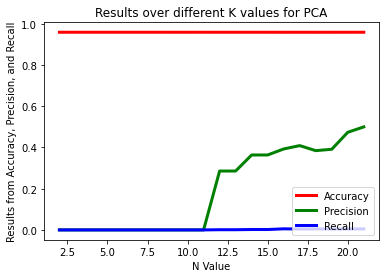

In [842]:
N_to_K = Parse(pcaDF,0)
Acc_Vals = Parse(pcaDF,1)
Prec_Vals = Parse(pcaDF,2)
Recall_Vals = Parse(pcaDF,3)

plt.plot(N_to_K, Acc_Vals, 'r', label = 'Accuracy',linewidth=3)
plt.plot(N_to_K, Prec_Vals, 'g', label = 'Precision', linewidth=3)
plt.plot(N_to_K, Recall_Vals,  'b', label = 'Recall', linewidth=3)

plt.title("Results over different K values for PCA")
plt.xlabel("N Value")
plt.ylabel("Results from Accuracy, Precision, and Recall")
plt.legend(loc = 'lower right')
plt.show()

In [843]:
#Part 2-b PCA with Naive Bayes

In [844]:
#Our Data set will consider Independent variables (X1-X30) and Label as Dependent (Y). 
X=stroke.iloc[:,[0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y=stroke.iloc[:,6].values #Stroke outcomes
#see here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.
Y[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [845]:
#Doing this scaling instead
#Now we’ll do feature scaling to scale our data between -1 and 1 using standardization.
#Here Scaling is important because there is a significant difference between explanatory variables. 
#scalar_X = StandardScaler()
scalar_X = MinMaxScaler()
X = scalar_X.fit_transform(X) #New X is scaled
X[0:2]

array([[0.        , 1.        , 1.        , 1.        , 0.3255814 ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 0.6       ,
        0.5       , 1.        , 0.        , 0.66666667, 0.6       ,
        0.28571429],
       [0.        , 0.        , 0.        , 0.        , 0.15116279,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.5       , 0.        ,
        0.        , 0.        , 0.        , 0.5       , 1.        ,
        0.        ]])

In [846]:
#Using Principle Component Analysis with specific N number of independent trainings
#Setting up function to plot precision, recall, and accuracy, over different K values.
#This involves creating a matrix to iterate over for the three results.
pcaDF = []

for i in range(20): #n_components must be between 0 and min(n_samples, n_features) = 30 with svd_solver='full'
    n_components = i + 2 #at least one array or dtype is required
    pca = PCA(n_components) #Iterating through all n values until reaching K.
    #principalComponents = pca.fit_transform(X_train)
    #-----------------------------------------------------------#
    principalComponents_train = pca.fit_transform(X)
    #------------------------------------------------------------#
    principalDf = pd.DataFrame(data = principalComponents_train, columns = range(n_components))
                 #, columns = ['principal component 1', 'principal component 2']) 
    finalDf = pd.concat([principalDf, stroke[['Stroke']]], axis = 1)
    Y_principal = finalDf.iloc[:,[n_components]].values
    X_principal = finalDf.iloc[:,0:(n_components - 1)] 
    
    #Doing Training and Test Split to evaluate accuracy.
    np.random.seed(0)
    X_train, X_test, Y_train, Y_test = train_test_split(X_principal,Y_principal,train_size =0.8,test_size = 0.2,random_state = 1)
    
    #Using Logistic Regression for Classification
    classifier_G = GaussianNB()
    classifier_G.fit(X_train, np.ravel(Y_train)) #Changed the shape of y to (n_samples, ) 
    
    Y_pred1 = classifier_G.predict(X_test)
    Y_pred1[0:9]
    
    #Using Confusion matrix representing binary classifiers so we can get accuracy of our model.
    cnf_matrix = confusion_matrix(Y_test,Y_pred1)
    cnf_matrix
    
    #We are evaluating the model using model evaluation metrics for accuracy.
    #Accuracy over loss is what needs to be plotted
    from sklearn import metrics
    Acc_score1 = metrics.accuracy_score(Y_test,Y_pred1)
    print("Accuracy:", Acc_score1)
    Prec_score1 = metrics.precision_score(Y_test,Y_pred1)
    print("Precision:", Prec_score1)
    Rec_score1 = metrics.recall_score(Y_test,Y_pred1)
    print("Recall:", Rec_score1)
    
    pcaDF.append([n_components,Acc_score1,Prec_score1,Rec_score1])
print(pcaDF)
    

Accuracy: 0.9591414380321666
Precision: 0.38461538461538464
Recall: 0.0024154589371980675
Accuracy: 0.959180857773573
Precision: 0.4
Recall: 0.000966183574879227
Accuracy: 0.9590034689372438
Precision: 0.35294117647058826
Recall: 0.005797101449275362
Accuracy: 0.9589837590665405
Precision: 0.3333333333333333
Recall: 0.005314009661835749
Accuracy: 0.95831362346263
Precision: 0.2897196261682243
Recall: 0.01497584541062802
Accuracy: 0.9578208766950489
Precision: 0.2535211267605634
Recall: 0.017391304347826087
Accuracy: 0.9524992116051719
Precision: 0.22312703583061888
Recall: 0.06618357487922705
Accuracy: 0.9521444339325134
Precision: 0.22796352583586627
Recall: 0.07246376811594203
Accuracy: 0.9469804478082624
Precision: 0.21818181818181817
Recall: 0.11594202898550725
Accuracy: 0.9442210659098076
Precision: 0.21976401179941002
Recall: 0.14396135265700483
Accuracy: 0.9242155471460107
Precision: 0.19864176570458403
Recall: 0.2826086956521739
Accuracy: 0.9141240933459477
Precision: 0.1886741

In [847]:
#Plotting classification accuracy, precision, and recall over different numbers of Ks

In [848]:
#function to get specific items from lists
def Parse(Value, i):
    return [item[i] for item in Value]

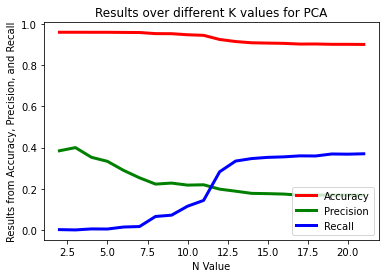

In [849]:
N_to_K = Parse(pcaDF,0)
Acc_Vals = Parse(pcaDF,1)
Prec_Vals = Parse(pcaDF,2)
Recall_Vals = Parse(pcaDF,3)

plt.plot(N_to_K, Acc_Vals, 'r', label = 'Accuracy',linewidth=3)
plt.plot(N_to_K, Prec_Vals, 'g', label = 'Precision', linewidth=3)
plt.plot(N_to_K, Recall_Vals,  'b', label = 'Recall', linewidth=3)

plt.title("Results over different K values for PCA")
plt.xlabel("N Value")
plt.ylabel("Results from Accuracy, Precision, and Recall")
plt.legend(loc = 'lower right')
plt.show()

In [850]:
#Part 3-a Using LDA feature extraction and Naive Bays Classifier for training

In [851]:
#Our Data set will consider Independent variables (X1-X30) and Label as Dependent (Y). 
X=stroke.iloc[:,[0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y=stroke.iloc[:,6].values #Stroke outcomes
#see here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.
Y[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [852]:
#Now we’ll do feature scaling to scale our data between -1 and 1 using standardization.
#Here Scaling is important because there is a significant difference between explanatory variables. 
#scalar_X = StandardScaler()
scalar_X = MinMaxScaler()
X = scalar_X.fit_transform(X) #New X_train is scaled
X[0:2]

array([[0.        , 1.        , 1.        , 1.        , 0.3255814 ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 0.6       ,
        0.5       , 1.        , 0.        , 0.66666667, 0.6       ,
        0.28571429],
       [0.        , 0.        , 0.        , 0.        , 0.15116279,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.5       , 0.        ,
        0.        , 0.        , 0.        , 0.5       , 1.        ,
        0.        ]])

In [853]:
#Fitting LDA to breast cancer dataset: 
#Our dataset only has 2 classes. Therefore value of N can only be N-1, 1 for this instance:
lda = LinearDiscriminantAnalysis(n_components = 1) #n_components cannot be larger than min(n_features, n_classes - 1).

#lda_t = lda.fit_transform(X_train,Y_train) 
lda_train = lda.fit_transform(X,Y)
#lda_test = lda.transform(X_test,Y_test)
#Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.

In [854]:
#Doing training and test split

np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(lda_train,Y,train_size =0.8, test_size = 0.2, random_state = 1)

In [855]:
#Using Naive Gaussian Bays for classification
classifier_G = GaussianNB()
classifier_G.fit(X_train,Y_train)

GaussianNB()

In [856]:
Y_pred = classifier_G.predict(X_test)
Y_pred

array([0., 0., 0., ..., 1., 0., 0.])

In [857]:
conf_matrix = confusion_matrix(Y_test,Y_pred)
conf_matrix

array([[47418,  1248],
       [ 1623,   447]], dtype=int64)

In [858]:
#We are evaluating the model using model evaluation metrics for accuracy, precision, and recall.
print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred))
print("Precision:",metrics.precision_score(Y_test,Y_pred))
print("Recall:",metrics.recall_score(Y_test,Y_pred))

Accuracy: 0.9434129612109745
Precision: 0.26371681415929205
Recall: 0.21594202898550724


Text(0.5, 257.44, 'Predicted label')

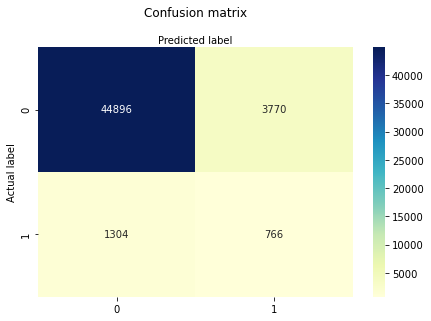

In [859]:
#Plotting the confustion Matrix
class_names = [0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [860]:
#Cannot plot classification accuracy, precision, and recall over different numbers of N given N can only equal 1.

In [861]:
#Part 3-b Using LDA feature extraction and Logistic Regression for training

In [862]:
#Our Data set will consider Independent variables (X1-X30) and Label as Dependent (Y). 
X=stroke.iloc[:,[0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y=stroke.iloc[:,6].values #Stroke outcomes
#see here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.

In [863]:
#Now we’ll do feature scaling to scale our data between -1 and 1 using standardization.
#Here Scaling is important because there is a significant difference between explanatory variables. 
#scalar_X = StandardScaler()
scalar_X = MinMaxScaler()
X = scalar_X.fit_transform(X) #New X_train is scaled
X[0:2]

array([[0.        , 1.        , 1.        , 1.        , 0.3255814 ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 0.6       ,
        0.5       , 1.        , 0.        , 0.66666667, 0.6       ,
        0.28571429],
       [0.        , 0.        , 0.        , 0.        , 0.15116279,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.5       , 0.        ,
        0.        , 0.        , 0.        , 0.5       , 1.        ,
        0.        ]])

In [864]:
#Fitting LDA to breast cancer dataset: 
lda = LinearDiscriminantAnalysis(n_components = 1) 
#lda_t = lda.fit_transform(X_train,Y_train)
lda_train = lda.fit_transform(X,Y)
#lda_test = lda.transform(X_test,Y_test)
#Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.

In [865]:
#Doing Training and Test Split to evaluate accuracy.
np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(lda_train,Y,train_size =0.8, test_size = 0.2, random_state = 1)

In [866]:
#plt.xlabel('LD1') 
#plt.ylabel('LD2') 
#plt.scatter(lda_t[:,0],lda_t[:,1],c=y,cmap='rainbow',edgecolors='r')

In [867]:
#Using Naive Logistic Regression for classification
classifier_L = LogisticRegression(random_state=0)
classifier_L.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [868]:
Y2_pred = classifier_L.predict(X_test)

In [869]:
Y2_pred[0:9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [870]:
#Using Confusion matrix representing binary classifiers so we can get accuracy of our model.
cnf_matrix = confusion_matrix(Y_test,Y2_pred)
cnf_matrix

array([[48665,     1],
       [ 2067,     3]], dtype=int64)

In [871]:
#We are evaluating the model using model evaluation metrics for accuracy, precision, and recall.
print("Accuracy:",metrics.accuracy_score(Y_test,Y2_pred))
print("Precision:",metrics.precision_score(Y_test,Y2_pred))
print("Recall:",metrics.recall_score(Y_test,Y2_pred))

Accuracy: 0.9592399873856827
Precision: 0.75
Recall: 0.0014492753623188406


Text(0.5, 257.44, 'Predicted label')

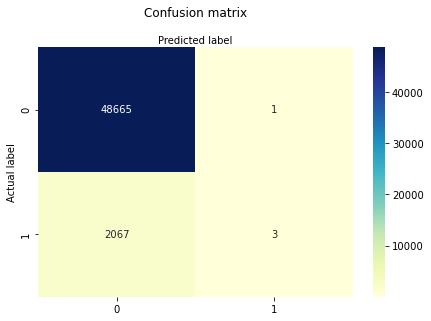

In [872]:
#Plotting the confustion Matrix
class_names = [0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')